# Libraries

In [1]:
# Necessary Libraries and Functions
import numpy as np  # For numerical computations
import pandas as pd  # For data manipulation and analysis
import matplotlib.pyplot as plt  # For basic data visualization
import seaborn as sns  # For advanced and attractive data visualization
from catboost import CatBoostClassifier  # A classifier optimized for categorical features
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                             f1_score, roc_auc_score)  # Metrics to evaluate model performance
from sklearn.model_selection import (train_test_split, GridSearchCV, 
                                      cross_validate)  # Data splitting, hyperparameter tuning, and cross-validation
from sklearn.preprocessing import LabelEncoder  # For encoding categorical labels to numeric
from sklearn.preprocessing import StandardScaler  # For standardizing features
import warnings  # To manage warning messages
warnings.simplefilter(action="ignore")  # Ignore all warning messages for cleaner outputs

In [2]:
# Installing the CatBoost library
# CatBoost is a gradient boosting library optimized for categorical data. 
# It is widely used for machine learning tasks involving structured data.
!pip install catboost

In [3]:
#Loading the dataset
df = pd.read_csv('/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.shape

(7043, 21)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
# Converting the 'TotalCharges' column to numeric data type
# Any errors during conversion (e.g., non-numeric values) will be set to NaN.
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors='coerce')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [9]:
# Converting 'Churn' column values to binary (1 for 'Yes', 0 for 'No')
# This is useful for classification tasks where the target variable should be numeric.
df["Churn"] = df["Churn"].apply(lambda x : 1 if x == "Yes" else 0)

## Exploratory Data Analysis (EDA)

**Exploratory Data Analysis (EDA)** is a process used to analyze and summarize the main characteristics of a dataset, usually with visual methods, before applying complex models.

**Key Steps in EDA**:
1. **Data Cleaning**: Handling missing values, errors, and duplicates.
2. **Descriptive Statistics**: Using measures like mean, median, and standard deviation to understand data distribution.
3. **Data Visualization**: Creating plots (e.g., histograms, boxplots, scatter plots) to visually explore the data.
4. **Correlation Analysis**: Checking relationships between variables using correlation coefficients.
5. **Outlier Detection**: Identifying unusual data points that may affect analysis.
6. **Feature Engineering**: Creating new features to improve analysis

**Goals of EDA:**
- Understand the data: Discover patterns and distributions.
- Identify outliers: Find unusual data points.
- Test assumptions: Ensure data meets the assumptions needed for modeling.
- Generate hypotheses: Identify relationships for further analysis.
EDA is crucial for getting a good understanding of the data before moving to more advanced analysis.

In [10]:
#Print the first 5 rows of the dataframe.
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [11]:
df.shape # Shape

(7043, 21)

In [12]:
df.dtypes # Types

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object

In [13]:
df.head(5) # Head

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [14]:
df.tail(5) # Tail

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,0
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,0
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,1
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.50,0


In [15]:
df.isnull().sum() # NA

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

*df.isnull().sum()* checks for missing (NaN) values in each column of the dataset. It's a crucial step in data cleaning, as missing data needs to be handled properly (e.g., filling or dropping missing values) for accurate analysis. This command helps quickly identify missing values in the dataset.

In [16]:
df_numeric = df.select_dtypes(include=['number'])
quantiles = df_numeric.quantile([0, 0.05, 0.50, 0.95, 0.99, 1]).T
print(quantiles)

                 0.00    0.05      0.50     0.95      0.99     1.00
SeniorCitizen    0.00   0.000     0.000     1.00     1.000     1.00
tenure           0.00   1.000    29.000    72.00    72.000    72.00
MonthlyCharges  18.25  19.650    70.350   107.40   114.729   118.75
TotalCharges    18.80  49.605  1397.475  6923.59  8039.883  8684.80
Churn            0.00   0.000     0.000     1.00     1.000     1.00


In [17]:
# Selecting only the numerical columns from the dataframe
# This filters out non-numeric columns, focusing only on the columns that contain numerical data.
df_numeric = df.select_dtypes(include=['number'])

# Calculating specific quantiles for the numeric columns
# This gives key statistical values like min, 5th percentile, median, 95th percentile, etc.
quantiles = df_numeric.quantile([0, 0.05, 0.50, 0.95, 0.99, 1]).T

# Printing the quantiles to inspect the distribution of the numeric columns
print(quantiles)

                 0.00    0.05      0.50     0.95      0.99     1.00
SeniorCitizen    0.00   0.000     0.000     1.00     1.000     1.00
tenure           0.00   1.000    29.000    72.00    72.000    72.00
MonthlyCharges  18.25  19.650    70.350   107.40   114.729   118.75
TotalCharges    18.80  49.605  1397.475  6923.59  8039.883  8684.80
Churn            0.00   0.000     0.000     1.00     1.000     1.00


- df.select_dtypes(include=['number']): Selects only the numerical columns from the dataframe, excluding non-numeric data.
 
- df_numeric.quantile([0, 0.05, 0.50, 0.95, 0.99, 1]).T: Calculates specified quantiles (e.g., 0%, 5%, 50%, 95%, 99%, 100%) for numeric columns, helping to understand data distribution. .T transposes the result for better readability, displaying quantiles as rows.

In [18]:
# Displaying a summary of the dataset
# This provides information about the number of non-null entries, column data types, and memory usage.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## Numerical and Categorical Variables Detection

In [19]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
    """
    This function categorizes columns into categorical, numerical, and cardinal categorical variables.
    Note: Categorical variables may also include numerical columns that are treated as categories.

    Parameters
    ----------
    dataframe: dataframe
        The dataframe from which variable names are to be extracted
    cat_th: int, optional
        Threshold for distinguishing numerical columns that should be treated as categorical (default is 10)
    car_th: int, optional
        Threshold for distinguishing categorical columns with cardinality (default is 20)

    Returns
    -------
    cat_cols: list
        List of categorical variable names
    num_cols: list
        List of numerical variable names
    cat_but_car: list
        List of categorical variables that are cardinal

    Examples
    --------
    import seaborn as sns
    df = sns.load_dataset("iris")
    print(grab_col_names(df))

    Notes
    ------
    cat_cols + num_cols + cat_but_car = total number of variables
    num_but_cat are included in cat_cols.
    """

    # Identify categorical columns (including numerical ones treated as categorical)
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    
    # Identify numerical columns that should be treated as categorical
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and dataframe[col].dtypes != "O"]
    
    # Identify categorical columns with high cardinality
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and dataframe[col].dtypes == "O"]
    
    # Update cat_cols to exclude columns that are categorical with high cardinality
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # Identify numerical columns
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    # Output the number of observations and variables, and the count of each category
    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')

    return cat_cols, num_cols, cat_but_car

In [20]:
# Grabbing column names based on their types (categorical, numerical, and cardinal categorical)
# This function categorizes columns into cat_cols (categorical), num_cols (numerical), and cat_but_car (categorical with high cardinality).
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 7043
Variables: 21
cat_cols: 17
num_cols: 3
cat_but_car: 1
num_but_cat: 2


In [21]:
cat_cols

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'SeniorCitizen',
 'Churn']

In [22]:
num_cols

['tenure', 'MonthlyCharges', 'TotalCharges']

In [23]:
cat_but_car

['customerID']

## Analysis of Categorical Variables

In [24]:
def cat_summary(dataframe, col_name, plot=False):
    """
    Summarizes a categorical column by showing value counts and their percentages.
    Optionally, plots a countplot for visual inspection of the distribution.

    Parameters
    ----------
    dataframe: pandas.DataFrame
        The input dataframe containing the data.
    col_name: str
        The categorical column to summarize.
    plot: bool, optional
        If True, displays a countplot of the column (default is False).

    Returns
    -------
    None
        Prints the value counts and optionally shows a plot.
    """
    # Display value counts and percentage distribution for the categorical column
    summary = pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                            "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)})
    print(summary)
    print("##########################################")
    
    # Plot the distribution if 'plot' is set to True
    if plot:
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.show()

- cat_summary(dataframe, col_name, plot=False): This function summarizes the categorical column by displaying the count of each category and its percentage in the dataset.
- summary: A DataFrame is created showing the value counts and the corresponding percentage (Ratio) for each category.
- sns.countplot(...): If plot=True, it visualizes the distribution of categories using a count plot.
  
This function is ideal for quickly analyzing the distribution of categorical variables. It provides both numerical summaries and visual inspection options.

In [25]:
# Looping through each column in the cat_cols list and calling the cat_summary function
# This will summarize each categorical column by displaying value counts and optionally plotting the distribution.
for col in cat_cols:
    cat_summary(df, col)

        gender     Ratio
gender                  
Male      3555  50.47565
Female    3488  49.52435
##########################################
         Partner     Ratio
Partner                   
No          3641  51.69672
Yes         3402  48.30328
##########################################
            Dependents      Ratio
Dependents                       
No                4933  70.041176
Yes               2110  29.958824
##########################################
              PhoneService      Ratio
PhoneService                         
Yes                   6361  90.316626
No                     682   9.683374
##########################################
                  MultipleLines      Ratio
MultipleLines                             
No                         3390  48.132898
Yes                        2971  42.183729
No phone service            682   9.683374
##########################################
                 InternetService      Ratio
InternetService               

## Analysis of Numerical Variables

In [26]:
def num_summary(dataframe, numerical_col, plot=False):
    """
    Summarizes a numerical column with key statistics and quantiles.
    Optionally, displays a histogram of the column for visual inspection.

    Parameters
    ----------
    dataframe: pandas.DataFrame
        The input dataframe containing the data.
    numerical_col: str
        The numerical column to summarize.
    plot: bool, optional
        If True, displays a histogram of the column (default is False).

    Returns
    -------
    None
        Prints the summary statistics and optionally shows a plot.
    """
    # Calculate and display summary statistics including specified quantiles
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    print(dataframe[numerical_col].describe(quantiles).T)

    # Optionally plot the histogram if 'plot' is True
    if plot:
        dataframe[numerical_col].hist(bins=20)
        plt.xlabel(numerical_col)
        plt.title(numerical_col)
        plt.show()

count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
5%          1.000000
10%         2.000000
20%         6.000000
30%        12.000000
40%        20.000000
50%        29.000000
60%        40.000000
70%        50.000000
80%        60.000000
90%        69.000000
95%        72.000000
99%        72.000000
max        72.000000
Name: tenure, dtype: float64


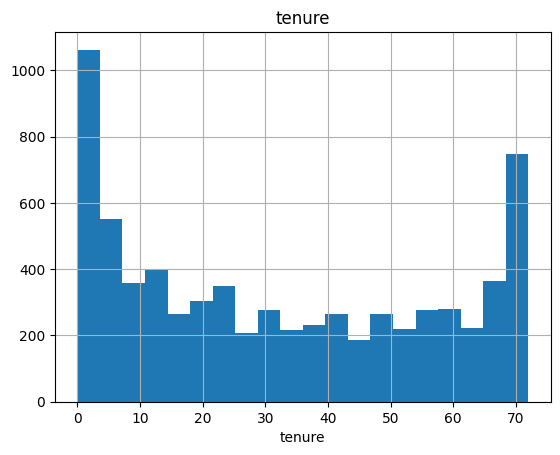

count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
5%         19.650000
10%        20.050000
20%        25.050000
30%        45.850000
40%        58.830000
50%        70.350000
60%        79.100000
70%        85.500000
80%        94.250000
90%       102.600000
95%       107.400000
99%       114.729000
max       118.750000
Name: MonthlyCharges, dtype: float64


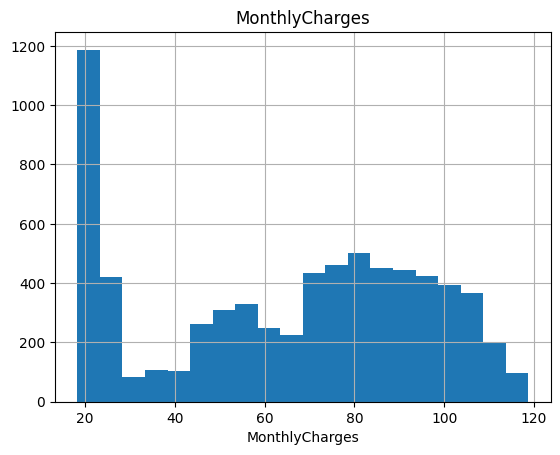

count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
5%         49.605000
10%        84.600000
20%       267.070000
30%       551.995000
40%       944.170000
50%      1397.475000
60%      2048.950000
70%      3141.130000
80%      4475.410000
90%      5976.640000
95%      6923.590000
99%      8039.883000
max      8684.800000
Name: TotalCharges, dtype: float64


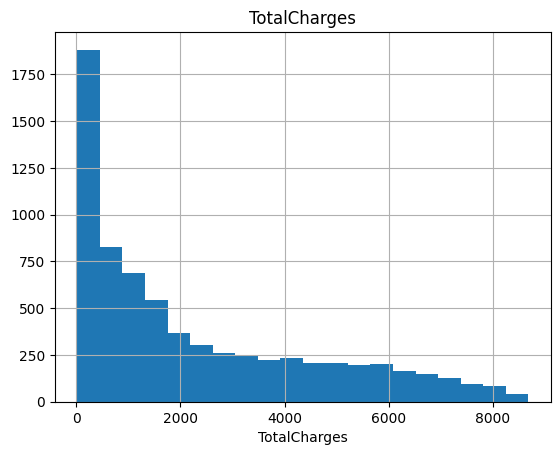

In [27]:
# Looping through each column in the num_cols list and calling the num_summary function
# This will summarize each numerical column with statistics and optionally display a histogram.
for col in num_cols:
    num_summary(df, col, plot=True)

## Analysis of Numerical Variables by Target

In [28]:
def target_summary_with_num(dataframe, target, numerical_col):
    """
    Summarizes the relationship between a numerical column and the target variable by calculating the mean.
    
    Parameters
    ----------
    dataframe: pandas.DataFrame
        The input dataframe containing the data.
    target: str
        The target column (typically the dependent variable).
    numerical_col: str
        The numerical column to summarize.

    Returns
    -------
    None
        Prints the mean of the numerical column grouped by the target variable.
    """
    # Group by the target variable and calculate the mean of the numerical column for each target value
    print(dataframe.groupby(target).agg({numerical_col: "mean"}), end="\n\n\n")

## Analysis of Categorical Variables by Target

In [29]:
def target_summary_with_cat(dataframe, target, categorical_col):
    """
    Summarizes the relationship between a categorical column and the target variable.
    Displays the mean of the target variable for each category, along with value counts and ratios for each category.

    Parameters
    ----------
    dataframe: pandas.DataFrame
        The input dataframe containing the data.
    target: str
        The target column (typically the dependent variable).
    categorical_col: str
        The categorical column to summarize.

    Returns
    -------
    None
        Prints a summary of the target variable's mean, count, and ratio for each category in the categorical column.
    """
    # Display the name of the categorical column
    print(categorical_col)
    
    # Group by the categorical column and calculate the mean of the target variable, value counts, and their ratios
    summary = pd.DataFrame({
        "TARGET_MEAN": dataframe.groupby(categorical_col)[target].mean(),
        "Count": dataframe[categorical_col].value_counts(),
        "Ratio": 100 * dataframe[categorical_col].value_counts() / len(dataframe)
    })
    
    # Print the summary
    print(summary, end="\n\n\n")

In [30]:
# Loop through each categorical column and calculate its relationship with the target variable "Churn"
# For each categorical column, the function `target_summary_with_cat` will be called to print the 
# mean of the target variable (Churn), count of each category, and the ratio for each category.
for col in cat_cols:
    target_summary_with_cat(df, "Churn", col)

gender
        TARGET_MEAN  Count     Ratio
gender                              
Female     0.269209   3488  49.52435
Male       0.261603   3555  50.47565


Partner
         TARGET_MEAN  Count     Ratio
Partner                              
No          0.329580   3641  51.69672
Yes         0.196649   3402  48.30328


Dependents
            TARGET_MEAN  Count      Ratio
Dependents                               
No             0.312791   4933  70.041176
Yes            0.154502   2110  29.958824


PhoneService
              TARGET_MEAN  Count      Ratio
PhoneService                               
No               0.249267    682   9.683374
Yes              0.267096   6361  90.316626


MultipleLines
                  TARGET_MEAN  Count      Ratio
MultipleLines                                  
No                   0.250442   3390  48.132898
No phone service     0.249267    682   9.683374
Yes                  0.286099   2971  42.183729


InternetService
                 TARGET_MEAN  Count  

## Correlation

**Correlation** is a measure of the relationship between two or more variables, showing how they move together. It is quantified using a **correlation coefficient** (usually denoted as **r**), which ranges from **-1** to **+1**:

- **+1**: Perfect positive correlation (both variables increase together).
- **-1**: Perfect negative correlation (one variable increases while the other decreases).
- **0**: No correlation (no relationship between the variables).


In summary:
- **Positive correlation** means both variables increase or decrease together.
- **Negative correlation** means one variable increases while the other decreases.
- **No correlation** means there is no clear relationship between the variables.
Correlation is commonly used to understand how variables are related in datasets, and can be visualized using scatter plots or heatmaps.

In [31]:
# Calculate the correlation matrix for numerical columns
df[num_cols].corr()

,tenure,MonthlyCharges,TotalCharges
tenure,1.00000,0.247900,0.825880
MonthlyCharges,0.24790,1.000000,0.651065
TotalCharges,0.82588,0.651065,1.000000


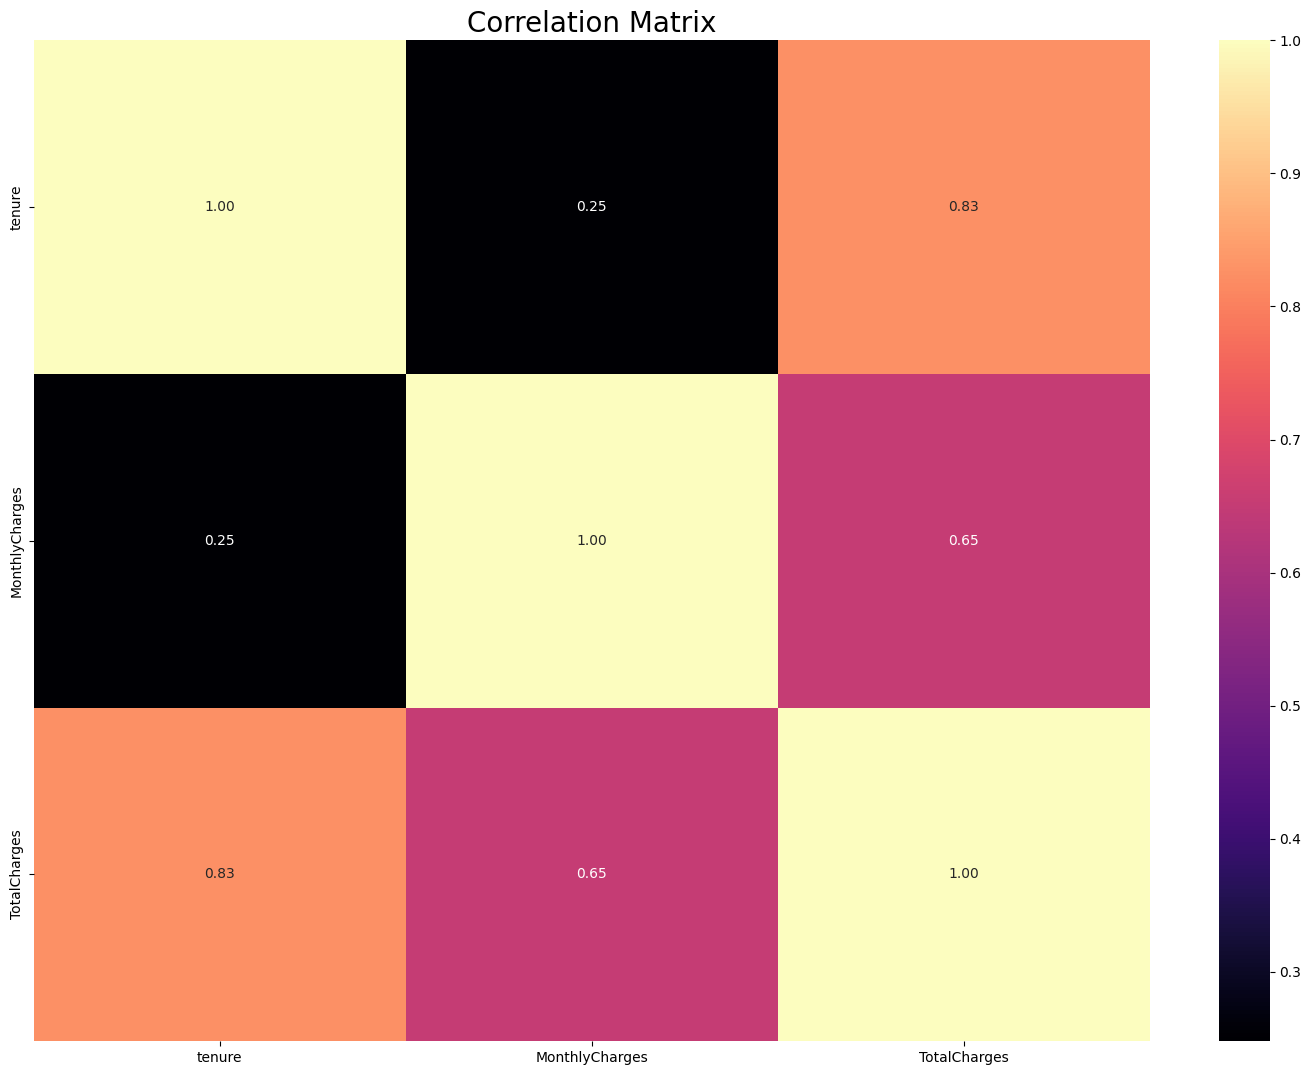

In [32]:
# Visualizing the correlation matrix using a heatmap
f, ax = plt.subplots(figsize=[18, 13])  # Set the figure size for the plot
sns.heatmap(df[num_cols].corr(), annot=True, fmt=".2f", ax=ax, cmap="magma")  # Draw the correlation matrix as a heatmap
ax.set_title("Correlation Matrix", fontsize=20)  # Set the title for the plot
plt.show()  # Display the plot

In [33]:
# Select only numeric columns to calculate correlation
df_numeric = df.select_dtypes(include=['number'])

# Calculate correlation with 'Churn' column
df_numeric.corrwith(df["Churn"]).sort_values(ascending=False)

Churn             1.000000
MonthlyCharges    0.193356
SeniorCitizen     0.150889
TotalCharges     -0.199484
tenure           -0.352229
dtype: float64

# FEATURE ENGINEERING

**Feature engineering** is the process of using domain knowledge to select, modify, or create new features (variables or columns) from raw data in order to improve the performance of machine learning models. It involves transforming raw data into formats that are more suitable for machine learning algorithms.

Some common feature engineering techniques include:

1. **Handling missing values**: Filling in missing data with appropriate values or removing rows/columns with missing values.
2. **Encoding categorical variables**: Converting categorical data into numerical formats (e.g., using one-hot encoding or label encoding).
3. **Feature scaling**: Normalizing or standardizing numerical features so that they have similar scales.
4. **Creating new features**: Combining existing features to create new, potentially more informative features (e.g., creating an "age group" feature from an "age" feature).
5.**Dimensionality reduction**: Reducing the number of features to avoid overfitting or improve model efficiency (e.g., using PCA).
6. **Binning**: Grouping continuous variables into bins (e.g., turning ages into age groups).
7. **Feature extraction**: Extracting features from unstructured data (like text, images, or time series) to use in machine learning models.
Effective feature engineering is crucial because it can significantly impact model performance and prediction accuracy.

## Missing Data Analysis

In [34]:
# Check for missing values (NaN) in each column
# This will give the count of missing values for every column in the DataFrame.
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [35]:
def missing_values_table(dataframe, na_name=False):
    """
    Detect and summarize missing values (NaN) in the DataFrame.

    Parameters:
    ----------
    dataframe : DataFrame
        The dataset to check for missing values.
    na_name : bool, optional
        If True, returns the list of columns with missing values. Default is False.
    
    Returns:
    -------
    If na_name is True, returns the list of columns with missing values.
    Otherwise, prints a summary of missing values and their ratios.
    """
    # Find columns with missing values (NaN)
    na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]
    
    # Count of missing values per column
    n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending=False)
    
    # Percentage of missing values per column
    ratio = (dataframe[na_columns].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)
    
    # Combine both counts and ratios into a DataFrame for display
    missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=['n_miss', 'ratio'])
    
    # Print missing values summary
    print(missing_df, end="\n")
    
    # Return the list of columns with missing values if requested
    if na_name:
        return na_columns

In [36]:
# Get the list of columns with missing values (NaN) by calling the missing_values_table function.
# This will return the names of columns containing missing values if 'na_name' is set to True.
na_columns = missing_values_table(df, na_name=True)

              n_miss  ratio
TotalCharges      11   0.16


In [37]:
na_columns

['TotalCharges']

In [38]:
# Fill missing values in 'TotalCharges' column with the median value.
# This approach is used because median is less sensitive to outliers compared to the mean.
# Alternatively, we could drop the 'TotalCharges' column if we believe it doesn't add significant value.
df["TotalCharges"].fillna(df["TotalCharges"].median(), inplace=True)

In [39]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

## Building the Base Model

In [40]:
# Create a copy of the original DataFrame to avoid modifying the original data.
# This is useful for preserving the integrity of the original dataset while performing operations on the copy.
dff = df.copy()

In [41]:
# Remove the 'Churn' column from the categorical features list as it is the target variable.
# The target variable should not be included in the feature set when building a model.
cat_cols = [col for col in cat_cols if col not in ["Churn"]]

In [42]:
cat_cols

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'SeniorCitizen']

In [43]:
# One-Hot Encoding function to convert categorical variables into binary variables.
# It creates dummy/indicator variables for each category in the categorical columns.
# The 'drop_first' parameter controls whether to drop the first category to avoid multicollinearity.
def one_hot_encoder(dataframe, categorical_cols, drop_first=False):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe

**What is One Hot Encoding?**


**One Hot Encoding** is a method for converting categorical variables into a binary format. It creates new binary columns (0s and 1s) for each category in the original variable. Each category in the original column is represented as a separate column, where a value of 1 indicates the presence of that category, and 0 indicates its absence.

**Why Use One Hot Encoding?**

The primary purpose of One Hot Encoding is to ensure that categorical data can be effectively used in machine learning models. Key reasons why this technique is beneficial:

1. **Eliminating Ordinality**: Many categorical variables have no inherent order (e.g., “Male” and “Female”). If we were to assign numerical values (e.g., Male = 0, Female = 1), the model might mistakenly interpret this as a ranking, leading to biased predictions. One Hot Encoding eliminates this risk by treating each category independently.

2. **Improving Model Performance**: By providing a more detailed representation of categorical variables, One Hot Encoding can help improve the performance of machine learning models. It allows models to capture complex relationships within the data that might be missed if categorical variables were treated as single entities.

3. **Compatibility with Algorithms**: Many machine learning algorithms, particularly those based on linear regression and gradient descent, require numerical input. One Hot Encoding ensures that categorical variables are converted into a suitable format.


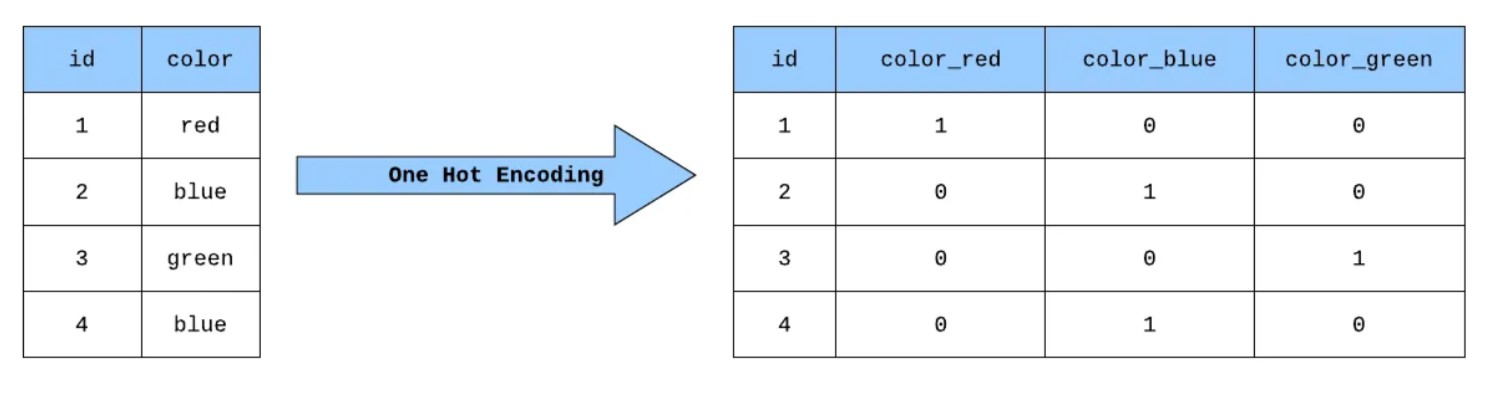

In [44]:
# Apply One-Hot Encoding to the categorical columns in the dataframe.
# The 'drop_first=True' parameter drops the first category in each column to avoid multicollinearity.
# This ensures that the resulting dummy variables are not highly correlated with each other.
dff = one_hot_encoder(dff, cat_cols, drop_first=True)

In [45]:
# Define the target variable (dependent variable) 'Churn'
y = dff["Churn"]

# Define the features (independent variables) by dropping the 'Churn' and 'customerID' columns.
# 'Churn' is the target variable, and 'customerID' is not relevant for modeling.
X = dff.drop(["Churn", "customerID"], axis=1)

In [46]:
# Split the dataset into training and testing sets.
# 30% of the data is used for testing and 70% for training.
# random_state is set for reproducibility (to ensure the same split each time).
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=17)

In [47]:
X_train.shape

(4930, 30)

In [48]:
y_train.shape

(4930,)

In [49]:
# Initialize and train a CatBoost classifier model.
# 'verbose=False' suppresses detailed output during model training.
# 'random_state=12345' ensures reproducibility of the model training.
catboost_model = CatBoostClassifier(verbose=False, random_state=12345).fit(X_train, y_train)

# Predict the target variable on the test set using the trained CatBoost model.
y_pred = catboost_model.predict(X_test)

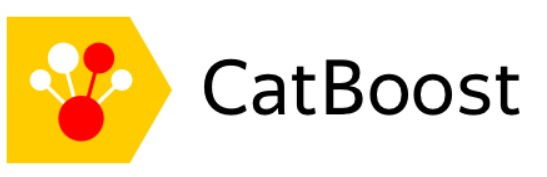

**CatBoostClassifier** is a component of the **CatBoost** algorithm developed by Yandex, and it is a powerful **gradient boosting** model specifically used for **classification problems**. The name "CatBoost" stands for **Categorical Boosting**, and it stands out due to its ability to handle **categorical data** efficiently. This feature distinguishes it from traditional **gradient boosting** algorithms (such as XGBoost or LightGBM).

**Key Features of CatBoostClassifier:**
1. **Handling Categorical Data**:

* CatBoost is one of the few algorithms that can work directly with categorical data. Typically, categorical data is converted into numerical values (e.g., using one-hot encoding or label encoding). However, CatBoost can perform these transformations automatically and efficiently, saving users time in preprocessing.
* CatBoost uses a technique called ordered boosting when working with categorical data, which improves the model's generalization ability in classification and regression tasks.

2. **Gradient Boosting Structure**:
* Similar to other gradient boosting algorithms, CatBoost builds trees sequentially, where each new tree corrects the errors from the previous iterations. This process follows the principles of ensemble learning, leading to strong predictive performance.
* Unlike other boosting algorithms, CatBoost typically works with shallower trees, which can speed up the training process.

3. **Combating Overfitting**:
* CatBoost uses techniques like ordered boosting and bayesian optimization to prevent overfitting. This feature helps improve the general performance of the model, especially in small and medium-sized datasets.
* The algorithm also requires less hyperparameter tuning, making it easier to obtain good results without manual optimization.

4. **Speed and Efficiency**:
* CatBoost is known for being efficient and faster compared to other gradient boosting algorithms, and it can provide rapid results even with large datasets.
* The algorithm supports multi-core processing and GPU acceleration, which allows it to leverage parallel processing and reduce training time.

5. **High Performance**:
* CatBoost often outperforms alternatives like XGBoost and LightGBM, as it has more customized optimization techniques and can handle a wider variety of data types more effectively.

6. **Model Interpretability**:
* CatBoost provides various interpretability tools that allow users to understand how the model makes its predictions. It offers feature importance rankings, helping analysts to determine which variables contribute the most to the model’s predictions.

**Use Cases for CatBoostClassifier**:

* When dealing with categorical data: In industries like e-commerce, finance, healthcare, and insurance, data often contains categorical features. CatBoost is highly efficient in handling such data.

* Large and complex datasets: CatBoost is particularly useful for large datasets, where it provides both high accuracy and speed.

* Classification problems: CatBoost can be used for both binary classification (e.g., yes/no outcomes) and multi-class classification (e.g., multiple categories).

**Advantages of CatBoost:**
* Native integration with categorical data: CatBoost handles categorical variables without the need for manual encoding, making the data preprocessing and modeling process faster.

* High accuracy: CatBoost frequently outperforms other gradient boosting algorithms, particularly on smaller datasets.

* Less hyperparameter tuning required: It requires less manual adjustment and hyperparameter optimization compared to other algorithms.

* Efficient modeling: It can work efficiently on large datasets with fast training and prediction times.;

In [50]:
# Print the evaluation metrics for the CatBoost model performance on the test set.
# These metrics help assess the model's effectiveness in terms of accuracy, recall, precision, F1 score, and AUC.

# Calculate and print accuracy
print(f"Accuracy: {round(accuracy_score(y_pred, y_test), 4)}")

# Calculate and print recall (sensitivity) - ability to correctly identify positive instances
print(f"Recall: {round(recall_score(y_pred, y_test), 4)}")

# Calculate and print precision - ability to correctly identify positive predictions
print(f"Precision: {round(precision_score(y_pred, y_test), 4)}")

# Calculate and print F1 score - harmonic mean of precision and recall, useful for imbalanced classes
print(f"F1: {round(f1_score(y_pred, y_test), 4)}")

# Calculate and print AUC (Area Under the ROC Curve) - measures the model's ability to distinguish between classes
print(f"Auc: {round(roc_auc_score(y_pred, y_test), 4)}")

Accuracy: 0.7847
Recall: 0.6331
Precision: 0.493
F1: 0.5544
Auc: 0.7292


**Model evaluation metrics** are quantitative measures used to assess the performance of a machine learning model. These metrics help to determine how well the model makes predictions and whether it meets the specific objectives of the task, such as classification, regression, or others. The choice of evaluation metric depends on the type of problem (e.g., classification or regression) and the business objectives.

#### Common Evaluation Metrics for Classification Models:
1. **Accuracy:**
- It measures the proportion of correct predictions (both true positives and true negatives) out of all predictions.
- Best used when the class distribution is balanced.
- Formula:
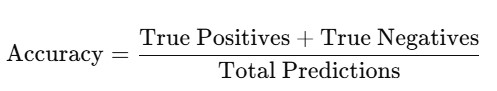

2. **Recall (Sensitivity or True Positive Rate):**
- It measures the proportion of actual positive cases that were correctly identified by the model.
- Useful when the cost of missing a positive class (false negative) is high.
- Formula:
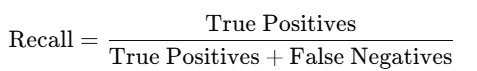

3. Precision:
- It measures the proportion of predicted positive cases that were actually positive.
- Important when the cost of a false positive is high (e.g., predicting a disease when there is none).
- Formula:
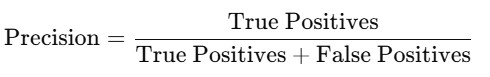

4. **F1 Score:**
- The harmonic mean of **Precision** and **Recall**, providing a balance between the two metrics.
- Useful when you need a balance between Precision and Recall, especially when there is an uneven class distribution.
- Formula:

    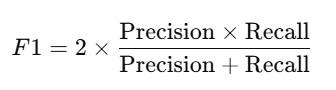

5. **AUC (Area Under the Curve):**
- It is the area under the **Receiver Operating Characteristic (ROC)** curve, which plots the true positive rate against the false positive rate.
- AUC provides an aggregate measure of performance across all classification thresholds, showing how well the model can distinguish between classes.
- A value closer to 1 indicates a better model performance.

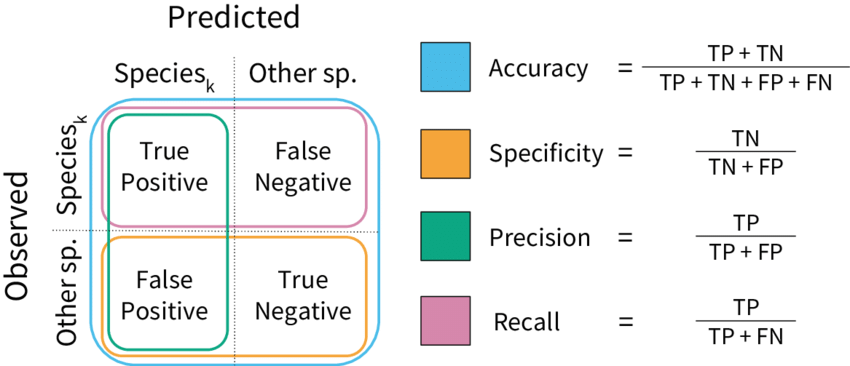

**Why are Model Evaluation Metrics Important?**
- **Assessing Model Performance**: Metrics help you evaluate how well the model performs and if it is achieving the desired outcomes.
- **Comparing Models**: They allow you to compare different models objectively.
- **Improving the Model**: Evaluation metrics help in fine-tuning the model, understanding where it is making mistakes, and improving its performance.

## Outlier Analysis

In [51]:
def outlier_thresholds(dataframe, col_name, q1=0.05, q3=0.95):
    """
    Calculates the lower and upper limits for detecting outliers in a given numerical column 
    based on the Interquartile Range (IQR) method. 

    Parameters:
    ----------
    dataframe: pandas.DataFrame
        The dataframe containing the data.
    col_name: str
        The name of the column for which outlier thresholds need to be calculated.
    q1: float, optional (default is 0.05)
        The lower quantile (default is 5%), representing the first quartile (25th percentile).
    q3: float, optional (default is 0.95)
        The upper quantile (default is 95%), representing the third quartile (75th percentile).

    Returns:
    -------
    tuple: (float, float)
        The lower limit and the upper limit beyond which data points are considered outliers.

    Notes:
    ------
    The IQR method defines the "acceptable" range as Q1 - 1.5 * IQR to Q3 + 1.5 * IQR.
    Any value outside this range is considered an outlier.
    """

    # Calculate the first quartile (Q1) and third quartile (Q3)
    quartile1 = dataframe[col_name].quantile(q1)  # Lower boundary of the IQR
    quartile3 = dataframe[col_name].quantile(q3)  # Upper boundary of the IQR

    # Compute the Interquartile Range (IQR)
    interquantile_range = quartile3 - quartile1  # The range between Q3 and Q1

    # Calculate the upper and lower bounds for outliers
    up_limit = quartile3 + 1.5 * interquantile_range  # Upper threshold for outliers
    low_limit = quartile1 - 1.5 * interquantile_range  # Lower threshold for outliers

    # Return the calculated lower and upper limits
    return low_limit, up_limit

IQR stands for Interquartile Range. It is a statistical measure of the spread of data, representing the range between the first quartile (Q1) and the third quartile (Q3) of a dataset. The IQR is calculated as the difference between Q3 and Q1.

It measures the middle 50% of the data and is used to identify outliers. Values that fall below Q1 minus 1.5 times the IQR or above Q3 plus 1.5 times the IQR are typically considered outliers.

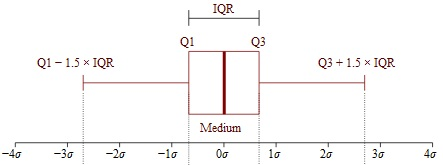

In [52]:
def check_outlier(dataframe, col_name):
    """
    Checks if there are outliers in the specified column based on the IQR method.

    Parameters:
    ----------
    dataframe: pandas.DataFrame
        The dataframe to check.
    col_name: str
        The column to check for outliers.

    Returns:
    -------
    bool:
        True if there are outliers, otherwise False.
    """

    # Calculate the IQR-based thresholds
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)

    # Check if any values are outside the thresholds
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True  # Outliers exist
    return False  # No outliers

In [53]:
def replace_with_thresholds(dataframe, variable, q1=0.05, q3=0.95):
    # Calculate outlier thresholds
    low_limit, up_limit = outlier_thresholds(dataframe, variable, q1, q3)

    # Replace outliers with limits
    dataframe.loc[dataframe[variable] < low_limit, variable] = low_limit
    dataframe.loc[dataframe[variable] > up_limit, variable] = up_limit

In [54]:
# Outlier Detection and Capping
for col in num_cols:
    print(col, check_outlier(df, col))  # Check if outliers exist
    if check_outlier(df, col):  # If outliers found
        replace_with_thresholds(df, col)  # Replace outliers with threshold values

tenure False
MonthlyCharges False
TotalCharges False


## Feature Extraction

In [55]:
# Creating a new categorical variable based on 'tenure' (customer's duration in service)
df.loc[(df["tenure"]>=0) & (df["tenure"]<=12),"NEW_TENURE_YEAR"] = "0-1 Year"  # 0 to 1 year
df.loc[(df["tenure"]>12) & (df["tenure"]<=24),"NEW_TENURE_YEAR"] = "1-2 Year"  # 1 to 2 years
df.loc[(df["tenure"]>24) & (df["tenure"]<=36),"NEW_TENURE_YEAR"] = "2-3 Year"  # 2 to 3 years
df.loc[(df["tenure"]>36) & (df["tenure"]<=48),"NEW_TENURE_YEAR"] = "3-4 Year"  # 3 to 4 years
df.loc[(df["tenure"]>48) & (df["tenure"]<=60),"NEW_TENURE_YEAR"] = "4-5 Year"  # 4 to 5 years
df.loc[(df["tenure"]>60) & (df["tenure"]<=72),"NEW_TENURE_YEAR"] = "5-6 Year"  # 5 to 6 years

In [56]:
# Mark customers with 1 or 2 year contract as 'Engaged'
df["NEW_Engaged"] = df["Contract"].apply(lambda x: 1 if x in ["One year", "Two year"] else 0)

In [57]:
# Mark customers who do not have any backup, protection, or tech support
df["NEW_noProt"] = df.apply(lambda x: 1 if (x["OnlineBackup"] != "Yes") or (x["DeviceProtection"] != "Yes") or (x["TechSupport"] != "Yes") else 0, axis=1)

In [58]:
# Mark customers who have a monthly contract and are young (not engaged and senior citizen is 0)
df["NEW_Young_Not_Engaged"] = df.apply(lambda x: 1 if (x["NEW_Engaged"] == 0) and (x["SeniorCitizen"] == 0) else 0, axis=1)

In [59]:
# Calculate the total number of services a person has
df['NEW_TotalServices'] = (df[['PhoneService', 'InternetService', 'OnlineSecurity',
                                'OnlineBackup', 'DeviceProtection', 'TechSupport',
                                'StreamingTV', 'StreamingMovies']] == 'Yes').sum(axis=1)

In [60]:
# Flag for people who have any streaming service
df["NEW_FLAG_ANY_STREAMING"] = df.apply(lambda x: 1 if (x["StreamingTV"] == "Yes") or (x["StreamingMovies"] == "Yes") else 0, axis=1)

In [61]:
# Flag for people who use automatic payment
df["NEW_FLAG_AutoPayment"] = df["PaymentMethod"].apply(lambda x: 1 if x in ["Bank transfer (automatic)", "Credit card (automatic)"] else 0)

In [62]:
# Calculate average monthly charges
df["NEW_AVG_Charges"] = df["TotalCharges"] / (df["tenure"] + 1)

In [63]:
# Calculate the increase in the current price compared to the average price
df["NEW_Increase"] = df["NEW_AVG_Charges"] / df["MonthlyCharges"]

In [64]:
# Calculate the average service fee per service
df["NEW_AVG_Service_Fee"] = df["MonthlyCharges"] / (df['NEW_TotalServices'] + 1)

In [65]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,NEW_TENURE_YEAR,NEW_Engaged,NEW_noProt,NEW_Young_Not_Engaged,NEW_TotalServices,NEW_FLAG_ANY_STREAMING,NEW_FLAG_AutoPayment,NEW_AVG_Charges,NEW_Increase,NEW_AVG_Service_Fee
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,0-1 Year,0,1,1,1,0,0,14.925000,0.500000,14.9250
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,2-3 Year,1,1,0,3,0,0,53.985714,0.947949,14.2375
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,0-1 Year,0,1,1,3,0,0,36.050000,0.669452,13.4625
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,3-4 Year,1,1,0,3,0,1,40.016304,0.946012,10.5750
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,0-1 Year,0,1,1,1,0,0,50.550000,0.714993,35.3500


In [66]:
df.shape

(7043, 31)

## ENCODING

In [67]:
# Variables categorization based on their types
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 7043
Variables: 31
cat_cols: 24
num_cols: 6
cat_but_car: 1
num_but_cat: 8


In [68]:
# Label Encoding
def label_encoder(dataframe, binary_col):
    labelencoder = LabelEncoder()  # Create a label encoder object
    dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])  # Encode the column
    return dataframe

**Label Encoder** is a technique used to convert categorical labels into numerical values. It is commonly used in machine learning when working with categorical data, especially when the algorithm expects numerical input.

Here’s how **Label Encoder** works:

- It takes a column of categorical data (e.g., "Yes", "No" or "Male", "Female") and converts each unique category into a number.
- For example, if you have a column with values ["Yes", "No", "Yes", "No"], the label encoder will map "Yes" to 1 and "No" to 0, transforming the data into [1, 0, 1, 0].

**Why Use Label Encoder?**
1. **Machine Learning Models**: Many machine learning models (e.g., decision trees, linear regression) can handle numerical data better, but they cannot process categorical data directly.
2. **Model Performance**: Label encoding ensures that categorical variables can be used in algorithms that require numeric data, such as Random Forest or Gradient Boosting.
3. **Speed and Efficiency**: Label encoding is a quick and efficient method for converting categorical features into a numeric format without creating additional features, unlike **One-Hot Encoding**.

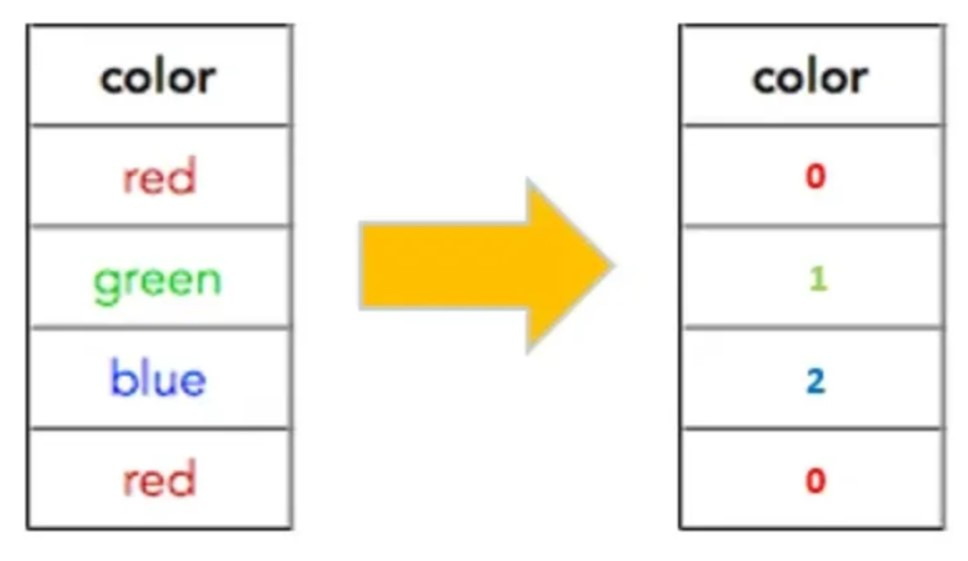

**Important Notes**:
- Label encoding is not suitable for nominal data where there is no ordinal relationship (i.e., the categories have no specific order). For example, if you encode "Red", "Blue", and "Green" as numbers 0, 1, and 2, the model might interpret these numbers as having a natural order, which is not true.
- In such cases, **One-Hot Encoding** may be a better choice.

In [69]:
# Identify binary columns (columns with exactly two unique values)
binary_cols = [col for col in df.columns if df[col].dtypes == "O" and df[col].nunique() == 2]

In [70]:
binary_cols

['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']

In [71]:
# Apply Label Encoding to each binary column in the DataFrame
for col in binary_cols:
    df = label_encoder(df, col)

In [72]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,NEW_TENURE_YEAR,NEW_Engaged,NEW_noProt,NEW_Young_Not_Engaged,NEW_TotalServices,NEW_FLAG_ANY_STREAMING,NEW_FLAG_AutoPayment,NEW_AVG_Charges,NEW_Increase,NEW_AVG_Service_Fee
0,7590-VHVEG,0,0,1,0,1,0,No phone service,DSL,No,...,0-1 Year,0,1,1,1,0,0,14.925000,0.500000,14.9250
1,5575-GNVDE,1,0,0,0,34,1,No,DSL,Yes,...,2-3 Year,1,1,0,3,0,0,53.985714,0.947949,14.2375
2,3668-QPYBK,1,0,0,0,2,1,No,DSL,Yes,...,0-1 Year,0,1,1,3,0,0,36.050000,0.669452,13.4625
3,7795-CFOCW,1,0,0,0,45,0,No phone service,DSL,Yes,...,3-4 Year,1,1,0,3,0,1,40.016304,0.946012,10.5750
4,9237-HQITU,0,0,0,0,2,1,No,Fiber optic,No,...,0-1 Year,0,1,1,1,0,0,50.550000,0.714993,35.3500


In [73]:
# Update the list of categorical columns for one-hot encoding by excluding binary columns and certain irrelevant columns
cat_cols = [col for col in cat_cols if col not in binary_cols and col not in ["Churn", "NEW_TotalServices"]]

In [74]:
cat_cols

['MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaymentMethod',
 'NEW_TENURE_YEAR',
 'SeniorCitizen',
 'NEW_Engaged',
 'NEW_noProt',
 'NEW_Young_Not_Engaged',
 'NEW_FLAG_ANY_STREAMING',
 'NEW_FLAG_AutoPayment']

In [75]:
def one_hot_encoder(dataframe, categorical_cols, drop_first=False):
    # Generate one-hot encoded columns for the specified categorical columns
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe

In [76]:
df = one_hot_encoder(df, cat_cols, drop_first=True)

In [77]:
df.head()

,customerID,gender,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,NEW_TENURE_YEAR_2-3 Year,NEW_TENURE_YEAR_3-4 Year,NEW_TENURE_YEAR_4-5 Year,NEW_TENURE_YEAR_5-6 Year,SeniorCitizen_1,NEW_Engaged_1,NEW_noProt_1,NEW_Young_Not_Engaged_1,NEW_FLAG_ANY_STREAMING_1,NEW_FLAG_AutoPayment_1
0,7590-VHVEG,0,1,0,1,0,1,29.85,29.85,0,...,False,False,False,False,False,False,True,True,False,False
1,5575-GNVDE,1,0,0,34,1,0,56.95,1889.50,0,...,True,False,False,False,False,True,True,False,False,False
2,3668-QPYBK,1,0,0,2,1,1,53.85,108.15,1,...,False,False,False,False,False,False,True,True,False,False
3,7795-CFOCW,1,0,0,45,0,0,42.30,1840.75,0,...,False,True,False,False,False,True,True,False,False,True
4,9237-HQITU,0,0,0,2,1,1,70.70,151.65,1,...,False,False,False,False,False,False,True,True,False,False


## Model Development

In [78]:
# Set the target variable (dependent variable)
y = df["Churn"]  # 'Churn' column is our target variable, representing whether a customer has churned (left) or not.

# Set the feature variables (independent variables)
X = df.drop(["Churn", "customerID"], axis=1)  # Dropping 'Churn' (the target variable) and 'customerID' (identifier, not useful as a feature)

In [79]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=17)  

In [80]:
catboost_model = CatBoostClassifier(verbose=False, random_state=12345).fit(X_train, y_train)
y_pred = catboost_model.predict(X_test)

In [81]:
print(f"Accuracy: {round(accuracy_score(y_pred, y_test), 2)}")
print(f"Recall: {round(recall_score(y_pred,y_test),2)}")
print(f"Precision: {round(precision_score(y_pred,y_test), 2)}")
print(f"F1: {round(f1_score(y_pred,y_test), 2)}")
print(f"Auc: {round(roc_auc_score(y_pred,y_test), 2)}")

Accuracy: 0.79
Recall: 0.65
Precision: 0.5
F1: 0.56
Auc: 0.74


In [82]:
# comparison

# Accuracy: 0.79
# Recall: 0.65
# Precision: 0.5
# F1: 0.56
# Auc: 0.74

# Accuracy: 0.7847
# Recall: 0.6331
# Precision: 0.493
# F1: 0.5544
# Auc: 0.7292